Refer to the attached README.md file for steps to configure the environment. 

i. Importing all the relevant libraries and packages.

In [1]:
import pandas as pd 
import rdkit
import numpy as np
from rdkit import Chem
import pubchempy
from rdkit.Chem import Descriptors, Draw, rdRGroupDecomposition, AssignStereochemistry
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Descriptors import MolWt, MolLogP, NumAromaticRings, NumHDonors, NumHAcceptors
from rdkit.Chem import PandasTools
import math 
import seaborn as sns 
from matplotlib import pyplot as plt 

ii. Invoke an sdf file given its path and returns a dataframe of rows and columns

,CAS number,chemical name,name IUPAC,merck index ref,literature ref,patent date,Launched date,FDA approved,code ATC,solubility,...,Synonyms,T max,protein binding rate,bioavailability,half life time,absorption rate,distribution volume,ID,SMILES,Molecule
0,134-58-7,Azaguanine-8,"5-Amino-3H-[1,2,3]triazolo[4,5-d]pyrimidin-7-ol","MI, 12, 928",Cancer Res. 1975 Oct 35(10):2872-8,08.09.1964,,,Not yet attributed,DMSO,...,,,,,,,,Compound 1,Nc1nc2[nH]nnc2c(=O)[nH]1,
1,57-67-0,Sulfaguanidine,4-amino-N-[amino(imino)methyl]benzenesulfonamide,"MI, 13, 8993",Contact Dermatitis. 2002 Mar 46(3):186-7,23.05.1950,,,A07AB03,DMSO,...,,,,,,,,Compound 2,N=C(N)NS(=O)(=O)c1ccc(N)cc1,
2,31430-18-9,Nocodazole,Methyl (5-(2-thienylcarbonyl)-1H-benz-imidazol...,,Mol Cancer Ther. 2011 Oct 10(10):1886-96,10.06.1983,,,Not yet attributed,DMSO 10mg/mL,...,,,,,,,,Compound 3,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,
3,992-21-2,Lymecycline,(+)-N-(5-amino-5-carboxypentylaminomethyl)-4-d...,"MI, 13, 5648",Eur J Dermatol. 2003 Mar-Apr 13(2):130-5,24.02.1982,1992,,J01AA04,,...,,3 - 4,,,8 - 10,,,Compound 4,CN(C)[C@H]1C(O)=C(C(=O)NCNC(CCCCN)C(=O)O)C(=O)...,
4,23930-37-2,Alfadolone acetate,"[2-[(3R,5S,8S,9S,10S,13S,14S,17S)-3-hydroxy-10...","MI, 13, 231",Anesthesiology. 1979 Apr 50(4):350-2,09.09.1987,Phase I,,Not yet attributed,,...,,,,,,,,Compound 5,CC(=O)OCC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@...,
5,23930-19-0,Alfaxalone,"(3R,5S,8S,9S,10S,13S,14S,17S)-17-acetyl-3-hydr...","MI, 13, 233",Mol Pharmacol. 1980 Jul 18(1):144-7,09.09.1987,,,N01AX05,,...,,,,,,,,Compound 6,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@H](O)CC...,
6,13539-59-8,Azapropazone,"5-(dimethylamino)-9-methyl-2-propylpyrazolo[1,...","MI, 13, 733",Curr Med Res Opin. 1976 4(1):3-16,24.10.1967,1970,,M01AX04,,...,,,,,,,,Compound 7,CCC[C@@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O,
7,59263-76-2,Meptazinol hydrochloride,3-(3-ethyl-1-methylazepan-3-yl)phenol hydrochl...,"MI, 13, 5888",Drugs. 1985 Oct 30(4):285-312,09.04.1970,1983,,N02AX05,,...,,0.4 - 1,,,,,,Compound 8,CC[C@]1(c2cccc(O)c2)CCCCN(C)C1.Cl,
8,37321-09-8,Apramycin,"(2R,3R,4R,5S,6R)-5-amino-2- [((1R,2R,3R,4R,6R,...","MI, 13, 757",Vet Q. 2001 Apr 23(2):62-6,08.04.1975,1980,,QJ01GB90,,...,,,,,,0 - 5,,Compound 9,CN[C@@H]1C(O[C@H]2O[C@H](CO)[C@@H](N)[C@H](O)[...,
9,2105-43-3,Fursultiamine Hydrochloride,N-(4-Amino-2-methylpyrimidin-5-ylmethyl)-N-[4-...,"MI, 13, 4332",Med Sci Monit. 2004 Sep 10(9):RA199-203,11.10.1966,,,Not yet attributed,,...,,,,,,,,Compound 10,C/C(=C(/CCO)SSC[C@H]1CCCO1)N(C=O)Cc1cnc(C)nc1N.Cl,

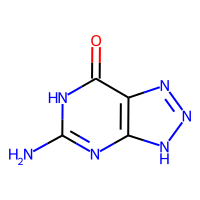
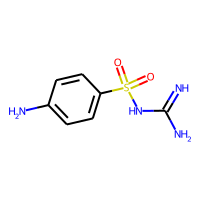
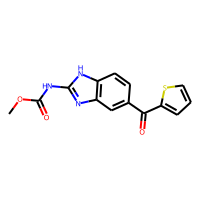
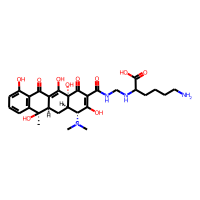
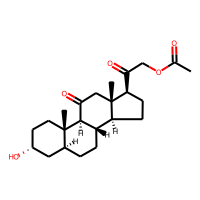
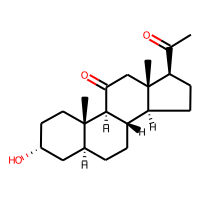
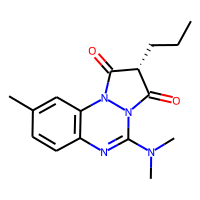
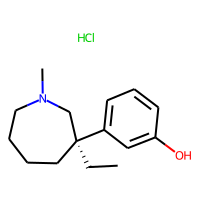
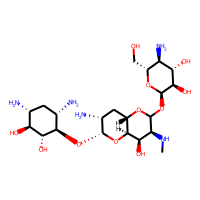
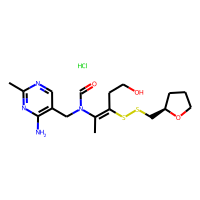

In [2]:
sdf_file_path = 'Drugs.sdf'
df = PandasTools.LoadSDF(sdf_file_path, smilesName='SMILES', molColName='Molecule')
df

iii. Calculating all the descriptors of the molecule.

,CAS number,chemical name,name IUPAC,merck index ref,literature ref,patent date,Launched date,FDA approved,code ATC,solubility,...,absorption rate,distribution volume,ID,SMILES,Molecule,Molwt,MolLogP,Num Aromatic Rings,HBA,HBD
0,134-58-7,Azaguanine-8,"5-Amino-3H-[1,2,3]triazolo[4,5-d]pyrimidin-7-ol","MI, 12, 928",Cancer Res. 1975 Oct 35(10):2872-8,08.09.1964,,,Not yet attributed,DMSO,...,,,Compound 1,Nc1nc2[nH]nnc2c(=O)[nH]1,,152.117,-1.37660,2,5,3
1,57-67-0,Sulfaguanidine,4-amino-N-[amino(imino)methyl]benzenesulfonamide,"MI, 13, 8993",Contact Dermatitis. 2002 Mar 46(3):186-7,23.05.1950,,,A07AB03,DMSO,...,,,Compound 2,N=C(N)NS(=O)(=O)c1ccc(N)cc1,,214.250,-0.55943,1,4,4
2,31430-18-9,Nocodazole,Methyl (5-(2-thienylcarbonyl)-1H-benz-imidazol...,,Mol Cancer Ther. 2011 Oct 10(10):1886-96,10.06.1983,,,Not yet attributed,DMSO 10mg/mL,...,,,Compound 3,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,,301.327,3.03370,3,5,2
3,992-21-2,Lymecycline,(+)-N-(5-amino-5-carboxypentylaminomethyl)-4-d...,"MI, 13, 5648",Eur J Dermatol. 2003 Mar-Apr 13(2):130-5,24.02.1982,1992,,J01AA04,,...,,,Compound 4,CN(C)[C@H]1C(O)=C(C(=O)NCNC(CCCCN)C(=O)O)C(=O)...,,602.641,-0.45420,1,12,9
4,23930-37-2,Alfadolone acetate,"[2-[(3R,5S,8S,9S,10S,13S,14S,17S)-3-hydroxy-10...","MI, 13, 231",Anesthesiology. 1979 Apr 50(4):350-2,09.09.1987,Phase I,,Not yet attributed,,...,,,Compound 5,CC(=O)OCC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@...,,390.520,3.31740,0,5,1
5,23930-19-0,Alfaxalone,"(3R,5S,8S,9S,10S,13S,14S,17S)-17-acetyl-3-hydr...","MI, 13, 233",Mol Pharmacol. 1980 Jul 18(1):144-7,09.09.1987,,,N01AX05,,...,,,Compound 6,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@H](O)CC...,,332.484,3.77420,0,3,1
6,13539-59-8,Azapropazone,"5-(dimethylamino)-9-methyl-2-propylpyrazolo[1,...","MI, 13, 733",Curr Med Res Opin. 1976 4(1):3-16,24.10.1967,1970,,M01AX04,,...,,,Compound 7,CCC[C@@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O,,300.362,2.06422,1,4,0
7,59263-76-2,Meptazinol hydrochloride,3-(3-ethyl-1-methylazepan-3-yl)phenol hydrochl...,"MI, 13, 5888",Drugs. 1985 Oct 30(4):285-312,09.04.1970,1983,,N02AX05,,...,,,Compound 8,CC[C@]1(c2cccc(O)c2)CCCCN(C)C1.Cl,,269.816,3.57750,1,2,1
8,37321-09-8,Apramycin,"(2R,3R,4R,5S,6R)-5-amino-2- [((1R,2R,3R,4R,6R,...","MI, 13, 757",Vet Q. 2001 Apr 23(2):62-6,08.04.1975,1980,,QJ01GB90,,...,0 - 5,,Compound 9,CN[C@@H]1C(O[C@H]2O[C@H](CO)[C@@H](N)[C@H](O)[...,,539.583,-6.94930,0,16,11
9,2105-43-3,Fursultiamine Hydrochloride,N-(4-Amino-2-methylpyrimidin-5-ylmethyl)-N-[4-...,"MI, 13, 4332",Med Sci Monit. 2004 Sep 10(9):RA199-203,11.10.1966,,,Not yet attributed,,...,,,Compound 10,C/C(=C(/CCO)SSC[C@H]1CCCO1)N(C=O)Cc1cnc(C)nc1N.Cl,,435.015,2.92172,1,8,2

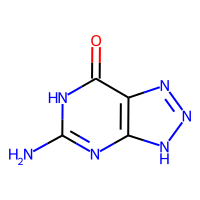
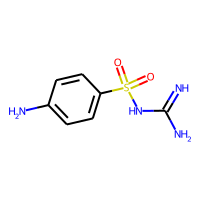
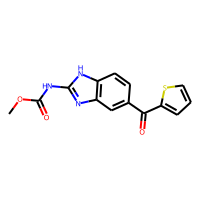
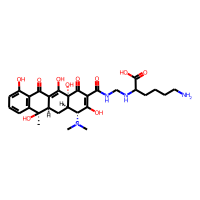
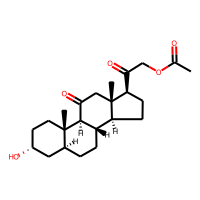
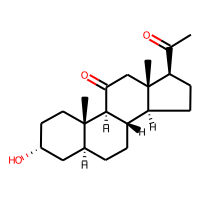
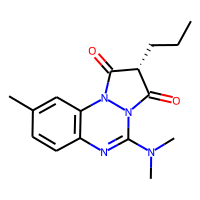
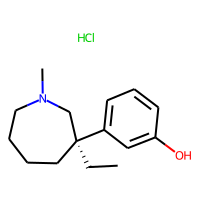
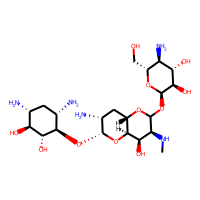
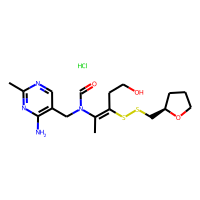

In [3]:
descriptors = ['Molwt', 'MolLogP', 'Num Aromatic Rings', 'HBA', 'HBD']
mol_wt, logp, num_arom_rings, num_h_acceptors, num_h_donors = [], [], [], [], []
for mol in df["Molecule"]:
    mol_wt.append(MolWt(mol))
    logp.append(MolLogP(mol))
    num_arom_rings.append(NumAromaticRings(mol))
    num_h_acceptors.append(NumHAcceptors(mol))
    num_h_donors.append(NumHDonors(mol))

# Assigning values of these descriptors wrt to the column names defined
df[descriptors[0]] = mol_wt
df[descriptors[1]] = logp
df[descriptors[2]] = num_arom_rings
df[descriptors[3]] = num_h_acceptors
df[descriptors[4]] = num_h_donors
df

iv. Gives the image of an molecule with stereo-annotations included - both absolute and enhanced stereo-labels.

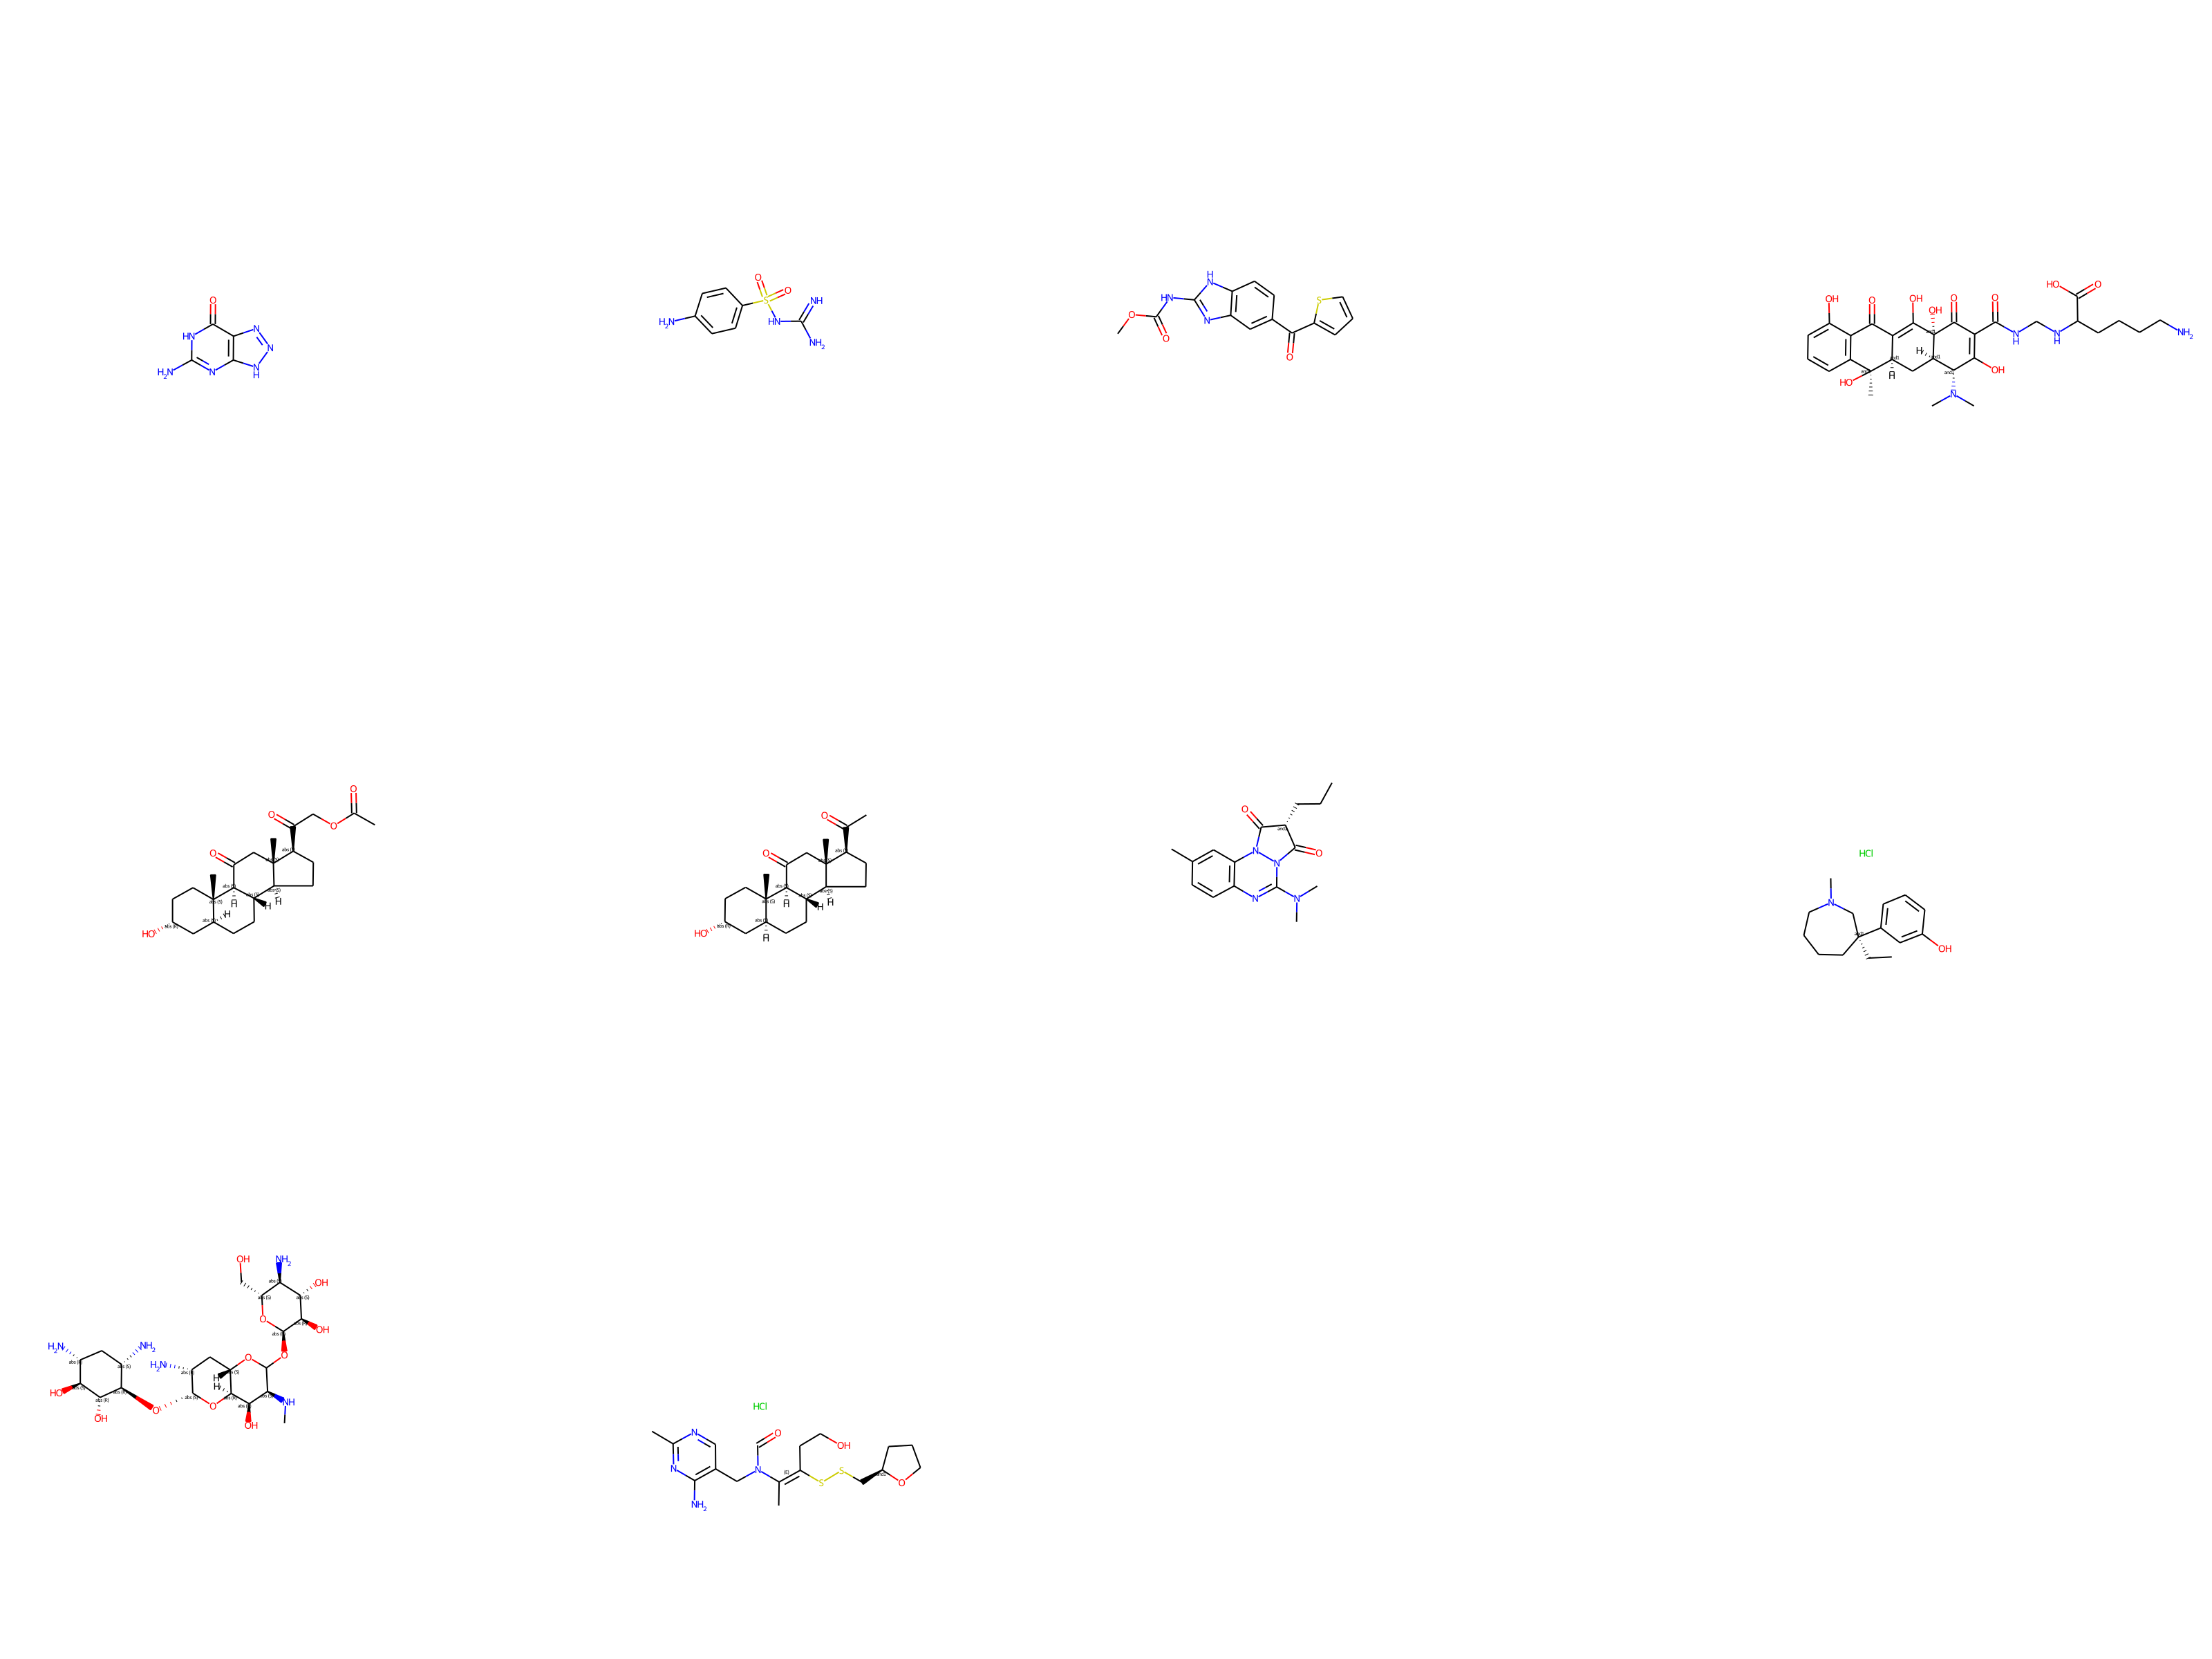

In [4]:
dos = Draw.MolDrawOptions()
dos.addStereoAnnotation = True

# Generating images in a grid and saving them in a file
img = Draw.MolsToGridImage(df["Molecule"], molsPerRow=4, subImgSize=(800, 800), drawOptions=dos)
img

v. Find out the IUPAC name of compounds in an sdf from the SMILES using the PubChemPy package.
The IUPAC information is already available in this Dataframe but the PubChemPy package was used incase it wasn't available.

In [5]:
for smiles in df["SMILES"]:
    compounds = pubchempy.get_compounds(smiles, namespace='smiles')
    match = compounds[0]
    print(match.iupac_name)

5-amino-2,6-dihydrotriazolo[4,5-d]pyrimidin-7-one
2-(4-aminophenyl)sulfonylguanidine
methyl N-[6-(thiophene-2-carbonyl)-1H-benzimidazol-2-yl]carbamate
None
[2-[(3R,5S,8S,9S,10S,13S,14S,17S)-3-hydroxy-10,13-dimethyl-11-oxo-1,2,3,4,5,6,7,8,9,12,14,15,16,17-tetradecahydrocyclopenta[a]phenanthren-17-yl]-2-oxoethyl] acetate
(3R,5S,8S,9S,10S,13S,14S,17S)-17-acetyl-3-hydroxy-10,13-dimethyl-1,2,3,4,5,6,7,8,9,12,14,15,16,17-tetradecahydrocyclopenta[a]phenanthren-11-one
(2S)-5-(dimethylamino)-9-methyl-2-propylpyrazolo[1,2-a][1,2,4]benzotriazine-1,3-dione
3-[(3R)-3-ethyl-1-methylazepan-3-yl]phenol;hydrochloride
(2R,3R,4S,5S,6S)-2-[[(3S,4R,4aR,6S,7R,8aS)-7-amino-6-[(1R,2R,3S,4R,6S)-4,6-diamino-2,3-dihydroxycyclohexyl]oxy-4-hydroxy-3-(methylamino)-2,3,4,4a,6,7,8,8a-octahydropyrano[3,2-b]pyran-2-yl]oxy]-5-amino-6-(hydroxymethyl)oxane-3,4-diol
N-[(4-amino-2-methylpyrimidin-5-yl)methyl]-N-[(E)-5-hydroxy-3-[[(2R)-oxolan-2-yl]methyldisulfanyl]pent-2-en-2-yl]formamide;hydrochloride


vi. Check if a compound passes the Lipinski filters in an sdf, returns True if so or else false.

In [6]:
filt = ((df["Molwt"] < 500) & (df["MolLogP"] < 5) & (df["HBD"] < 5) & (df["HBA"] < 10))
filt

0     True
1     True
2     True
3    False
4     True
5     True
6     True
7     True
8    False
9     True
dtype: bool

vii. Sorting problems: 
    a. Sort by launched date
    b. Sorted by therapeutic class name and secondary sorted by Molecular weight
    c. Filtered rows for a particular therapeutic class and then sorted by Molecular weight. 
    This was done because, some cells have more than one therapeutic class. 

,CAS number,chemical name,name IUPAC,merck index ref,literature ref,patent date,Launched date,FDA approved,code ATC,solubility,...,absorption rate,distribution volume,ID,SMILES,Molecule,Molwt,MolLogP,Num Aromatic Rings,HBA,HBD
4,23930-37-2,Alfadolone acetate,"[2-[(3R,5S,8S,9S,10S,13S,14S,17S)-3-hydroxy-10...","MI, 13, 231",Anesthesiology. 1979 Apr 50(4):350-2,09.09.1987,Phase I,,Not yet attributed,,...,,,Compound 5,CC(=O)OCC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@...,,390.520,3.31740,0,5,1
3,992-21-2,Lymecycline,(+)-N-(5-amino-5-carboxypentylaminomethyl)-4-d...,"MI, 13, 5648",Eur J Dermatol. 2003 Mar-Apr 13(2):130-5,24.02.1982,1992,,J01AA04,,...,,,Compound 4,CN(C)[C@H]1C(O)=C(C(=O)NCNC(CCCCN)C(=O)O)C(=O)...,,602.641,-0.45420,1,12,9
7,59263-76-2,Meptazinol hydrochloride,3-(3-ethyl-1-methylazepan-3-yl)phenol hydrochl...,"MI, 13, 5888",Drugs. 1985 Oct 30(4):285-312,09.04.1970,1983,,N02AX05,,...,,,Compound 8,CC[C@]1(c2cccc(O)c2)CCCCN(C)C1.Cl,,269.816,3.57750,1,2,1
8,37321-09-8,Apramycin,"(2R,3R,4R,5S,6R)-5-amino-2- [((1R,2R,3R,4R,6R,...","MI, 13, 757",Vet Q. 2001 Apr 23(2):62-6,08.04.1975,1980,,QJ01GB90,,...,0 - 5,,Compound 9,CN[C@@H]1C(O[C@H]2O[C@H](CO)[C@@H](N)[C@H](O)[...,,539.583,-6.94930,0,16,11
6,13539-59-8,Azapropazone,"5-(dimethylamino)-9-methyl-2-propylpyrazolo[1,...","MI, 13, 733",Curr Med Res Opin. 1976 4(1):3-16,24.10.1967,1970,,M01AX04,,...,,,Compound 7,CCC[C@@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O,,300.362,2.06422,1,4,0
0,134-58-7,Azaguanine-8,"5-Amino-3H-[1,2,3]triazolo[4,5-d]pyrimidin-7-ol","MI, 12, 928",Cancer Res. 1975 Oct 35(10):2872-8,08.09.1964,,,Not yet attributed,DMSO,...,,,Compound 1,Nc1nc2[nH]nnc2c(=O)[nH]1,,152.117,-1.37660,2,5,3
1,57-67-0,Sulfaguanidine,4-amino-N-[amino(imino)methyl]benzenesulfonamide,"MI, 13, 8993",Contact Dermatitis. 2002 Mar 46(3):186-7,23.05.1950,,,A07AB03,DMSO,...,,,Compound 2,N=C(N)NS(=O)(=O)c1ccc(N)cc1,,214.250,-0.55943,1,4,4
2,31430-18-9,Nocodazole,Methyl (5-(2-thienylcarbonyl)-1H-benz-imidazol...,,Mol Cancer Ther. 2011 Oct 10(10):1886-96,10.06.1983,,,Not yet attributed,DMSO 10mg/mL,...,,,Compound 3,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,,301.327,3.03370,3,5,2
5,23930-19-0,Alfaxalone,"(3R,5S,8S,9S,10S,13S,14S,17S)-17-acetyl-3-hydr...","MI, 13, 233",Mol Pharmacol. 1980 Jul 18(1):144-7,09.09.1987,,,N01AX05,,...,,,Compound 6,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@H](O)CC...,,332.484,3.77420,0,3,1
9,2105-43-3,Fursultiamine Hydrochloride,N-(4-Amino-2-methylpyrimidin-5-ylmethyl)-N-[4-...,"MI, 13, 4332",Med Sci Monit. 2004 Sep 10(9):RA199-203,11.10.1966,,,Not yet attributed,,...,,,Compound 10,C/C(=C(/CCO)SSC[C@H]1CCCO1)N(C=O)Cc1cnc(C)nc1N.Cl,,435.015,2.92172,1,8,2

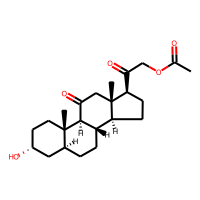
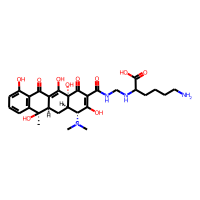
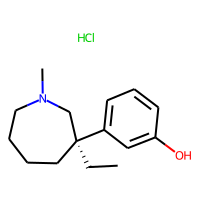
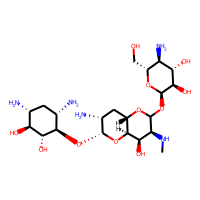
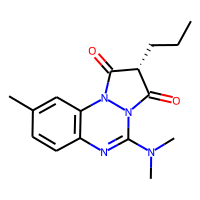
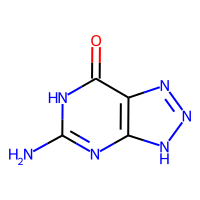
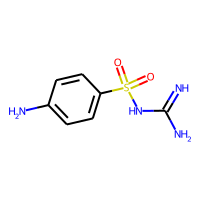
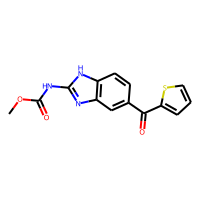
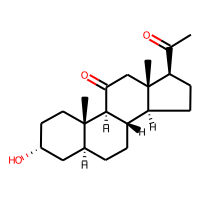
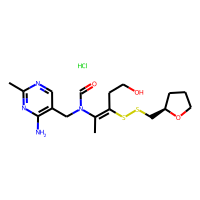

In [7]:
df.sort_values(by="Launched date", ascending=False)

,CAS number,chemical name,name IUPAC,merck index ref,literature ref,patent date,Launched date,FDA approved,code ATC,solubility,...,absorption rate,distribution volume,ID,SMILES,Molecule,Molwt,MolLogP,Num Aromatic Rings,HBA,HBD
0,134-58-7,Azaguanine-8,"5-Amino-3H-[1,2,3]triazolo[4,5-d]pyrimidin-7-ol","MI, 12, 928",Cancer Res. 1975 Oct 35(10):2872-8,08.09.1964,,,Not yet attributed,DMSO,...,,,Compound 1,Nc1nc2[nH]nnc2c(=O)[nH]1,,152.117,-1.37660,2,5,3
2,31430-18-9,Nocodazole,Methyl (5-(2-thienylcarbonyl)-1H-benz-imidazol...,,Mol Cancer Ther. 2011 Oct 10(10):1886-96,10.06.1983,,,Not yet attributed,DMSO 10mg/mL,...,,,Compound 3,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,,301.327,3.03370,3,5,2
3,992-21-2,Lymecycline,(+)-N-(5-amino-5-carboxypentylaminomethyl)-4-d...,"MI, 13, 5648",Eur J Dermatol. 2003 Mar-Apr 13(2):130-5,24.02.1982,1992,,J01AA04,,...,,,Compound 4,CN(C)[C@H]1C(O)=C(C(=O)NCNC(CCCCN)C(=O)O)C(=O)...,,602.641,-0.45420,1,12,9
9,2105-43-3,Fursultiamine Hydrochloride,N-(4-Amino-2-methylpyrimidin-5-ylmethyl)-N-[4-...,"MI, 13, 4332",Med Sci Monit. 2004 Sep 10(9):RA199-203,11.10.1966,,,Not yet attributed,,...,,,Compound 10,C/C(=C(/CCO)SSC[C@H]1CCCO1)N(C=O)Cc1cnc(C)nc1N.Cl,,435.015,2.92172,1,8,2
1,57-67-0,Sulfaguanidine,4-amino-N-[amino(imino)methyl]benzenesulfonamide,"MI, 13, 8993",Contact Dermatitis. 2002 Mar 46(3):186-7,23.05.1950,,,A07AB03,DMSO,...,,,Compound 2,N=C(N)NS(=O)(=O)c1ccc(N)cc1,,214.250,-0.55943,1,4,4
8,37321-09-8,Apramycin,"(2R,3R,4R,5S,6R)-5-amino-2- [((1R,2R,3R,4R,6R,...","MI, 13, 757",Vet Q. 2001 Apr 23(2):62-6,08.04.1975,1980,,QJ01GB90,,...,0 - 5,,Compound 9,CN[C@@H]1C(O[C@H]2O[C@H](CO)[C@@H](N)[C@H](O)[...,,539.583,-6.94930,0,16,11
6,13539-59-8,Azapropazone,"5-(dimethylamino)-9-methyl-2-propylpyrazolo[1,...","MI, 13, 733",Curr Med Res Opin. 1976 4(1):3-16,24.10.1967,1970,,M01AX04,,...,,,Compound 7,CCC[C@@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O,,300.362,2.06422,1,4,0
4,23930-37-2,Alfadolone acetate,"[2-[(3R,5S,8S,9S,10S,13S,14S,17S)-3-hydroxy-10...","MI, 13, 231",Anesthesiology. 1979 Apr 50(4):350-2,09.09.1987,Phase I,,Not yet attributed,,...,,,Compound 5,CC(=O)OCC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@...,,390.520,3.31740,0,5,1
5,23930-19-0,Alfaxalone,"(3R,5S,8S,9S,10S,13S,14S,17S)-17-acetyl-3-hydr...","MI, 13, 233",Mol Pharmacol. 1980 Jul 18(1):144-7,09.09.1987,,,N01AX05,,...,,,Compound 6,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@H](O)CC...,,332.484,3.77420,0,3,1
7,59263-76-2,Meptazinol hydrochloride,3-(3-ethyl-1-methylazepan-3-yl)phenol hydrochl...,"MI, 13, 5888",Drugs. 1985 Oct 30(4):285-312,09.04.1970,1983,,N02AX05,,...,,,Compound 8,CC[C@]1(c2cccc(O)c2)CCCCN(C)C1.Cl,,269.816,3.57750,1,2,1

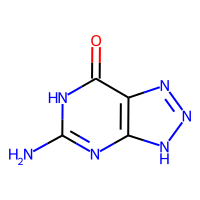
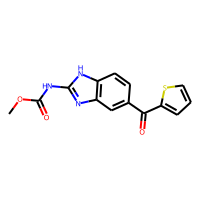
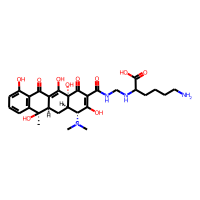
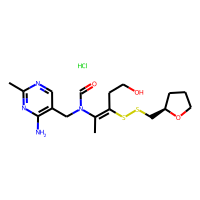
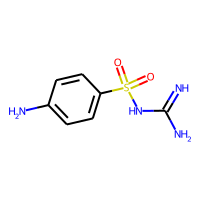
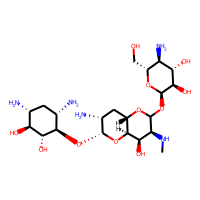
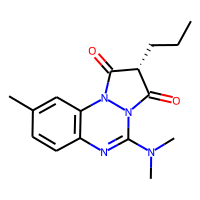
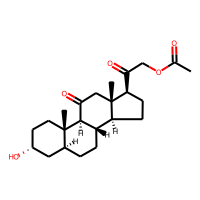
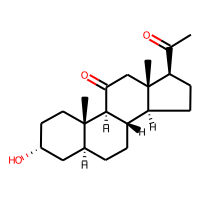
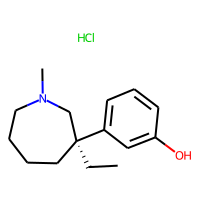

In [8]:
df.sort_values(by="therapeutic class name", ascending=False)

In [9]:
df_sorted = df.sort_values(["therapeutic class name", "Molwt"], ascending=[True, True])
df_sorted[["SMILES", "Molwt", "therapeutic class name"]]


,SMILES,Molwt,therapeutic class name
7,CC[C@]1(c2cccc(O)c2)CCCCN(C)C1.Cl,269.816,Central Nervous System
5,CC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@H](O)CC...,332.484,Central Nervous System
4,CC(=O)OCC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4C[C@...,390.520,Central Nervous System
6,CCC[C@@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O,300.362,"Central Nervous System, Metabolism"
1,N=C(N)NS(=O)(=O)c1ccc(N)cc1,214.250,"Infectiology, Metabolism"
8,CN[C@@H]1C(O[C@H]2O[C@H](CO)[C@@H](N)[C@H](O)[...,539.583,"Infectiology, Metabolism"
9,C/C(=C(/CCO)SSC[C@H]1CCCO1)N(C=O)Cc1cnc(C)nc1N.Cl,435.015,Metabolism
3,CN(C)[C@H]1C(O)=C(C(=O)NCNC(CCCCN)C(=O)O)C(=O)...,602.641,Metabolism
0,Nc1nc2[nH]nnc2c(=O)[nH]1,152.117,Oncology
2,COC(=O)Nc1nc2cc(C(=O)c3cccs3)ccc2[nH]1,301.327,Oncology


In [10]:
filt = df.loc[df['therapeutic class name'].str.contains("Metabolism", case=False)]
df = filt.sort_values(by="Molwt", ascending=True)
df["Molwt"]

1    214.250
6    300.362
9    435.015
8    539.583
3    602.641
Name: Molwt, dtype: float64

viii. Substructure Search using the '<='operator

In [11]:
steroid_scaffold = Chem.MolFromSmiles('N=C(N)NS(=O)(=O)c1ccc(N)cc1')
steroid_scaffold_comps = df[df['Molecule'] <= steroid_scaffold]
print(steroid_scaffold_comps[["name IUPAC", "SMILES"]])

                                         name IUPAC  \
1  4-amino-N-[amino(imino)methyl]benzenesulfonamide   

                        SMILES  
1  N=C(N)NS(=O)(=O)c1ccc(N)cc1  


ix. Method for finding the stereochemistry (absolute configurations) of molecules in an sdf.

In [12]:
stereo_active = 0
stereo_inactive = 0
dict_smi_stereo_status = {}
# Iterating over the smiles to using the RDKit FindMolChiralCenters method to calculate absolute stereo-configuration.
for smi in df["SMILES"]:
    chirality = Chem.FindMolChiralCenters(Chem.MolFromSmiles(smi), includeUnassigned=True)
    if not chirality:
        stereo_status = "Not Stereoactive"
        absolute_stereo_config = "N/A"
        stereo_inactive = stereo_inactive + 1
    else:
        stereo_status = "Stereoactive"
        absolute_stereo_config = chirality
        stereo_active = stereo_active + 1
# Storing the results in a dictionary with the smiles as a key and the values as a tuple of stereostatus and absolute stereoconfig.
    dict_smi_stereo_status[smi] = (stereo_status, absolute_stereo_config)
        # Storing the count of molecules that are stereoactive and stereo-inactive in a dictionary.
stereo_count = {"StereoActive": stereo_active, "Stereo_Inactive": stereo_inactive}
print(dict_smi_stereo_status, stereo_count)

{'N=C(N)NS(=O)(=O)c1ccc(N)cc1': ('Not Stereoactive', 'N/A'), 'CCC[C@@H]1C(=O)N2C(N(C)C)=Nc3ccc(C)cc3N2C1=O': ('Stereoactive', [(3, 'S')]), 'C/C(=C(/CCO)SSC[C@H]1CCCO1)N(C=O)Cc1cnc(C)nc1N.Cl': ('Stereoactive', [(9, 'R')]), 'CN[C@@H]1C(O[C@H]2O[C@H](CO)[C@@H](N)[C@H](O)[C@H]2O)O[C@H]2C[C@@H](N)[C@@H](O[C@@H]3[C@@H](N)C[C@@H](N)[C@H](O)[C@H]3O)O[C@@H]2[C@@H]1O': ('Stereoactive', [(2, 'S'), (3, '?'), (5, 'R'), (7, 'S'), (10, 'S'), (12, 'S'), (14, 'R'), (17, 'S'), (19, 'R'), (21, 'S'), (23, 'R'), (24, 'S'), (27, 'R'), (29, 'S'), (31, 'R'), (34, 'R'), (35, 'R')]), 'CN(C)[C@H]1C(O)=C(C(=O)NCNC(CCCCN)C(=O)O)C(=O)[C@]2(O)C(O)=C3C(=O)c4c(O)cccc4[C@](C)(O)[C@@H]3C[C@H]12': ('Stereoactive', [(3, 'R'), (12, '?'), (23, 'R'), (37, 'R'), (40, 'R'), (42, 'R')])} {'StereoActive': 4, 'Stereo_Inactive': 1}
